In [1]:
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
import numpy as np


Выбрем распределение хи-квадрат с числом степеней свободы, равным 78.

In [2]:
df = 78
r = chi2.rvs(df, size=1000)

Построим график теоретической плотности вероятности и гистограмму распределения.

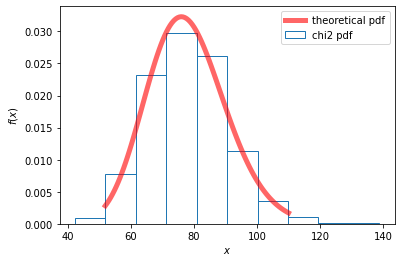

In [3]:
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
fig, ax = plt.subplots(1, 1)
color = next(ax._get_lines.prop_cycler)["color"]
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='theoretical pdf', c = 'r')
x = np.linspace(0, 150, 100)
pdf = chi2.pdf(x, df)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.hist(r, bins=10, density=True, color=color, edgecolor=color, fc="None", label='chi2 pdf')
ax.legend()

Сгенерируем по 1000 выборок размера 5, 10 и 50.

In [4]:
n_value = [5, 10, 50]
dlist = [[],[],[]]
for index, n in enumerate(n_value):
    s = 0
    for i in range(1000):
        r = chi2.rvs(df, size=n)
        N = np.mean(r)
        dlist[index].append(N)

Определим математическое ожидание и сигму для выборочного среднего.

Математическое ожидание у распределения хи-квадрат = df,
Дисперсия равна 2df.

Значит мат. ожидание выборочного среднего равно df, а дисперсия = 2df/n, где n - объём выборки.

In [5]:
mu = df
sigma = np.sqrt(2*df/5)

In [6]:
x = np.linspace(40, 100, 1000)

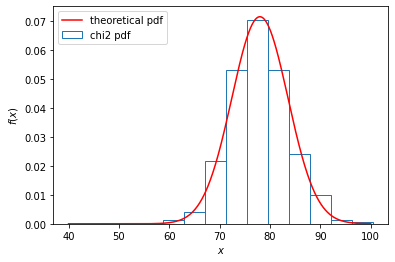

In [7]:
plt.plot(x, norm.pdf(x, mu, sigma), c='r', label='theoretical pdf')
plt.hist(dlist[0], density=True, color=color, edgecolor=color, fc="None", label='chi2 pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

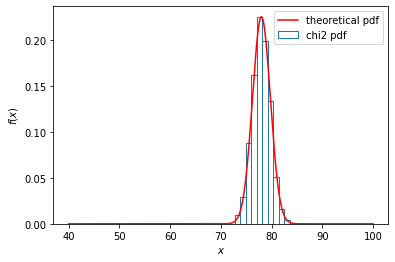

In [8]:
sigma = np.sqrt(2*df/50)
plt.plot(x, norm.pdf(x, mu, sigma), c='r', label='theoretical pdf')
plt.hist(dlist[2], bins=10, density=True, color=color, edgecolor=color, fc="None", label='chi2 pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

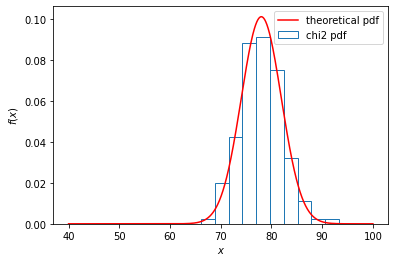

In [9]:
sigma = np.sqrt(2*df/10)
plt.plot(x, norm.pdf(x, mu, sigma), c='r', label='theoretical pdf')
plt.hist(dlist[1], bins=10, density=True, color=color, edgecolor=color, fc="None", label='chi2 pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()


Как видим, с увеличением числа выборок распределения из N выборок больше становится похожим на нормальное распределение.
Что подтверждает центральную предельную теорему.